# Periodic Boundary Conditions

Sometimes the domain on which you sample your data is
periodic, or at least some dimensions are periodic. This can also
be taken account in *findiff*.


## Differential Operators

Suppose we want to differentiate the 1D-arrays `f` and the grid is periodic along the 0-axis.


In [1]:
import numpy as np
from findiff import Diff

# note the "endpoint" argument:
x = np.linspace(0, 2*np.pi, 100, endpoint=False)
dx = x[1] - x[0]
f = np.sin(x) # as an example

# define the derivative with periodic boundary condition:
d_dx = Diff(0, dx, periodic=True)

# apply it:
df_fx = d_dx(f)

In [2]:
import matplotlib.pyplot as plt

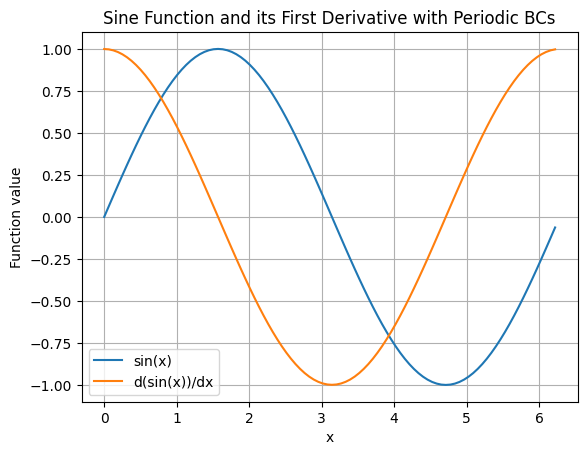

In [3]:
plt.plot(x, f, label='sin(x)')
plt.plot(x, df_fx, label="d(sin(x))/dx")
plt.legend()
plt.title('Sine Function and its First Derivative with Periodic BCs')
plt.xlabel('x')
plt.ylabel('Function value')
plt.grid()
plt.show()


Alternatively, you can specify the grid after defining the derivative. That is
sometimes useful when you define a complicated combination of derivative operators, so
can can set the grid once for the combined operator instead of for each part individually.

In [4]:
d_dx = Diff(0)
d_dx.set_grid({0: {"h": dx, "periodic": True}})

df_fx = d_dx(f)

Note the syntax of `set_grid`. It accepts a dictionary defining for each required axis (0 in this case)
the spacing "h" and a flag "periodic". If you specify an axis with non-periodic boundary conditions,
you can simply pass a number instead of a dictionary. Of course, you can also mix periodic with non-periodic
boundary conditions. For example, if you have a 2D grid with periodic boundary conditions in, say,
the x-direction only, then you way write

In [18]:
x = np.linspace(0, 2 * np.pi, 100, endpoint=False)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y, indexing="ij")
f = np.sin(X) ** 2 * np.sin(Y) ** 2 # as an example

dx = x[1] - x[0]
dy = y[1] - y[0]

d_dx = Diff(0, acc=6)

d_dx.set_grid({0: {"h": dx, "periodic": True}, 1: dy})

actual = d_dx(f)

expected = 2 * np.sin(X) * np.cos(X) * np.sin(Y)**2

np.max(abs(actual - expected))

np.float64(1.981609665246964e-08)

## Ordinary Differential Equations

Let's solve an ordinary differential equation with periodic boundary conditions.
To be specific,

$$
\left(\frac{d^2}{dx^2} + 1\right)f(x) = 0
$$

and we import the periodic boundary condition $f(0) = f(2\pi)$. Since we have a second order ODE, we need
one more boundary/initial condition, let's say $f(0) = 1$.

Using *findiff* we can solve it like that:

In [5]:
import numpy as np
from findiff import Diff, BoundaryConditions, PDE

# define the differential operator:
D = Diff(0) ** 2 + 1

# define the periodic grid
shape = 100,
x = np.linspace(0, 2*np.pi, shape[0], endpoint=False)
dx = x[1] - x[0]

D.set_grid({0: {"h": dx, "periodic": True}})
D.set_accuracy(4)

bc = BoundaryConditions(shape)

bc[0] = 1

ode = PDE(D, np.zeros_like(x), bc)
actual = ode.solve()

expected = np.cos(x)

np.max(abs(actual - expected))

np.float64(2.0152754715008214e-07)